FOREST COVER TYPE PREDICTION PROJECT 

In [202]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [174]:
# Step 2: Load Dataset
data = pd.read_csv('train.csv')


In [175]:
# Step 3: Basic Dataset Overview
print("Dataset Overview:")
print(data.head())
print(data.info())
print("Missing Values in Each Column:")
print(data.isnull().sum())

Dataset Overview:
   Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1       

In [176]:
# Step 4: Visualize Distributions of Continuous Features
continuous_features = [
    'Elevation', 
    'Aspect', 
    'Slope', 
    'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology', 
    'Horizontal_Distance_To_Roadways', 
    'Hillshade_9am',    
    'Hillshade_Noon', 
    'Hillshade_3pm', 
    'Horizontal_Distance_To_Fire_Points'
]

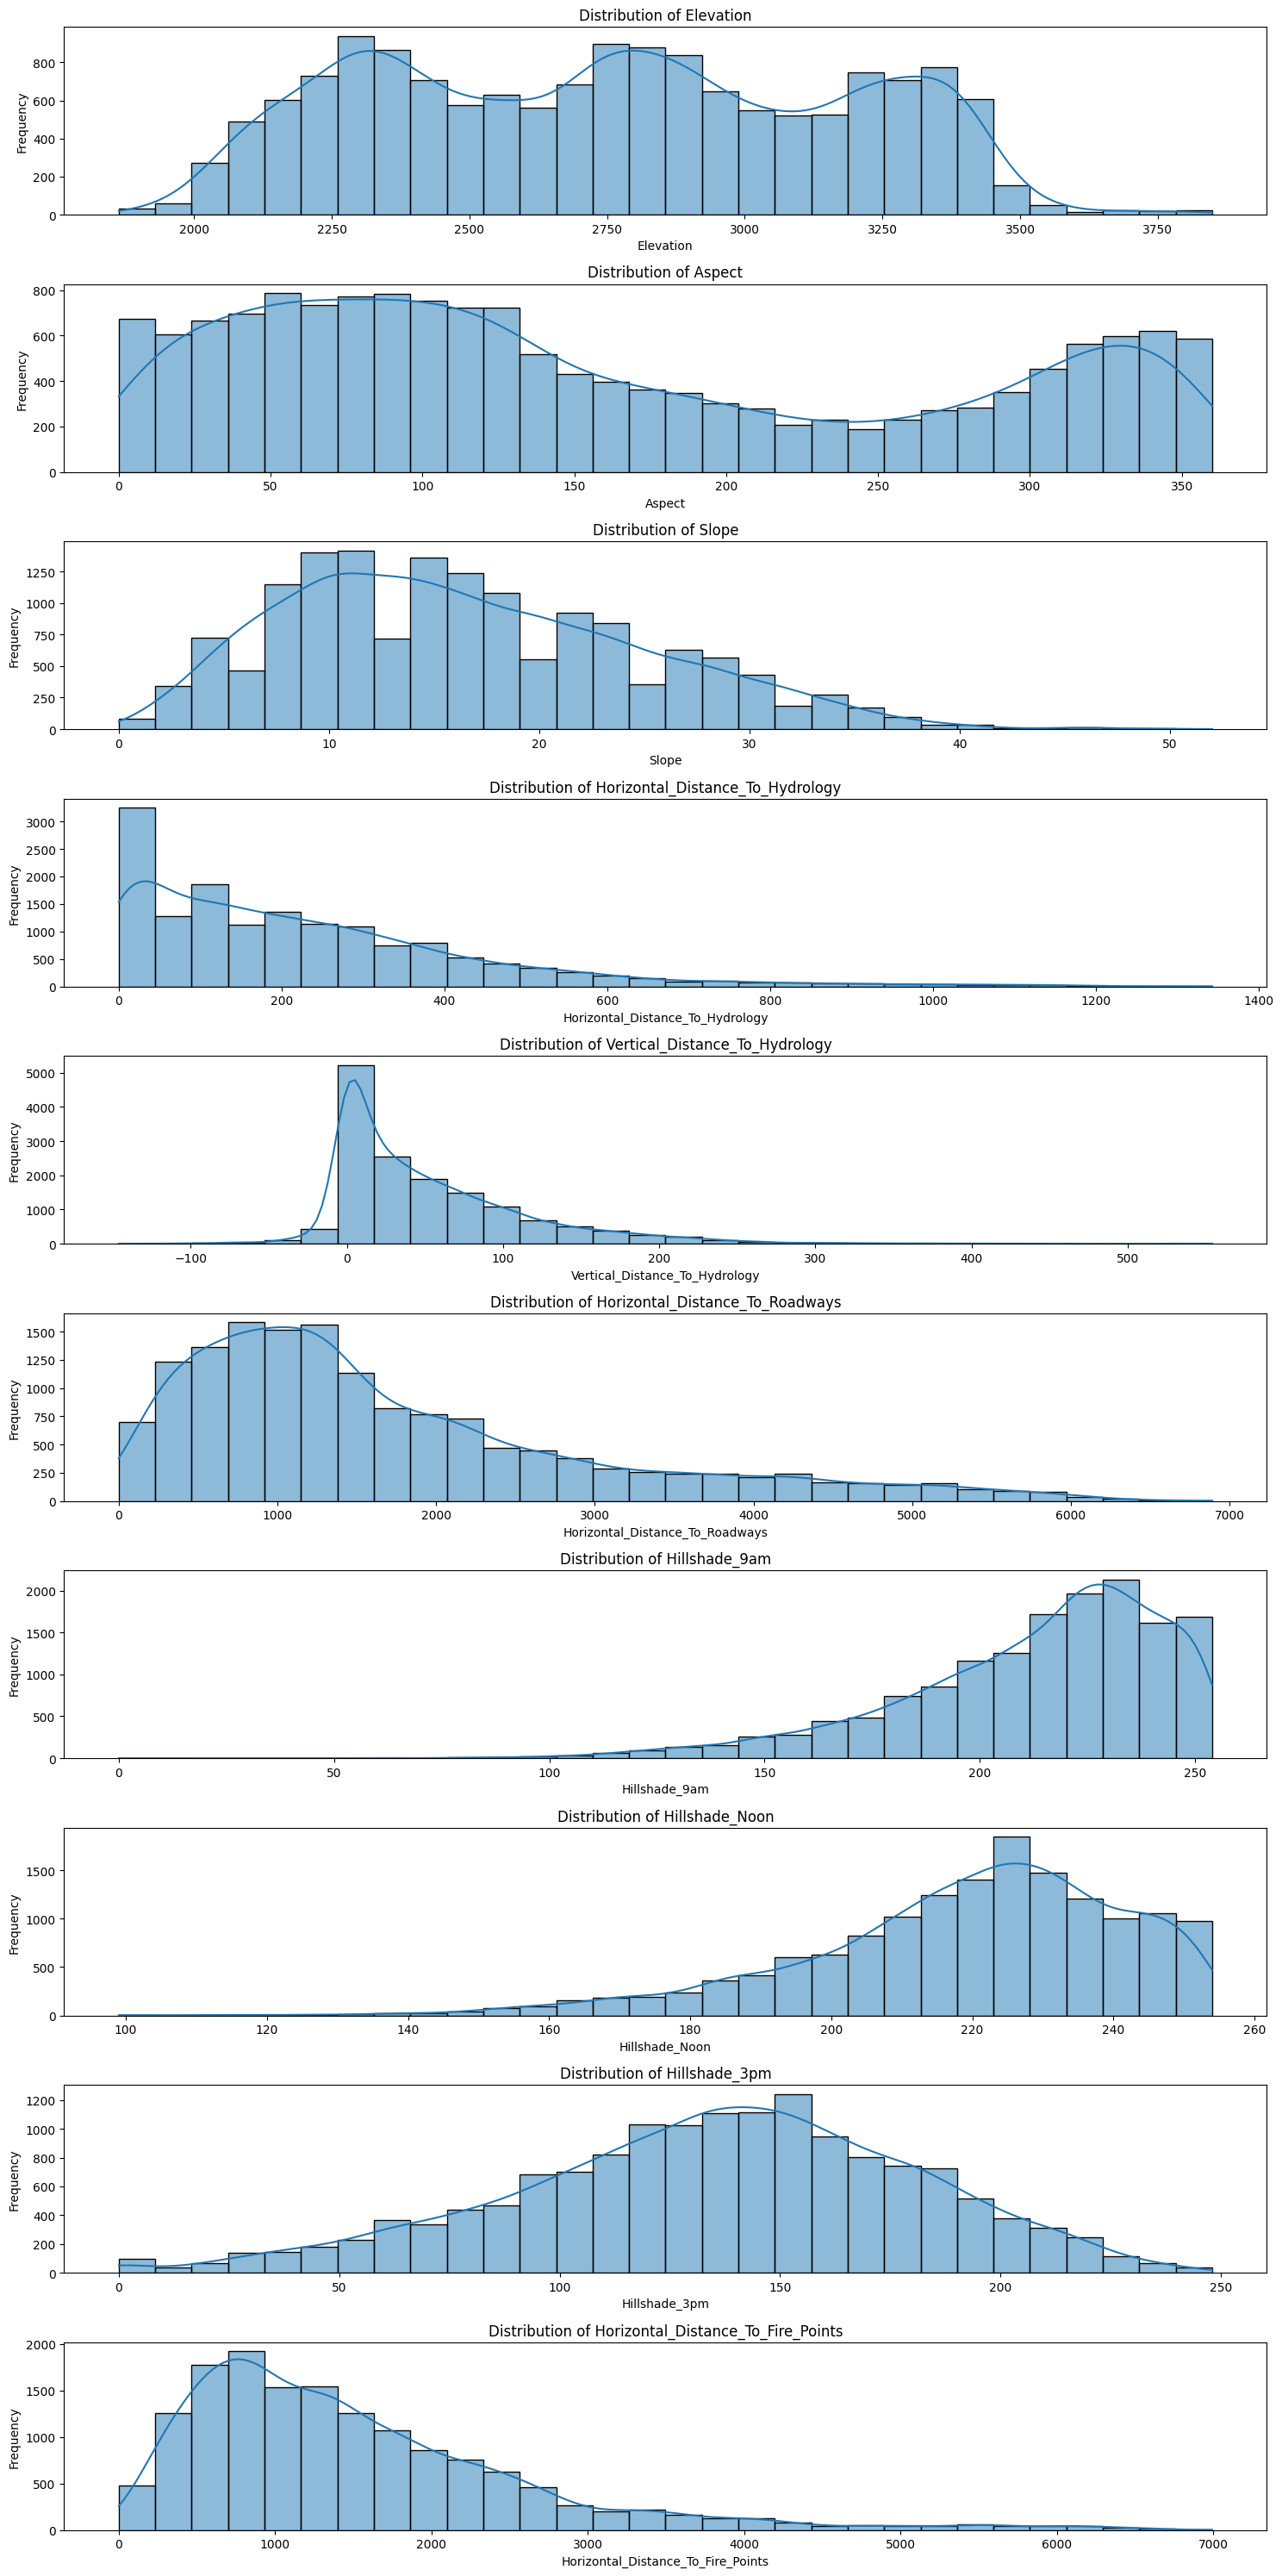

In [177]:
# Step 4.1: Histograms of Continuous Features
plt.figure(figsize=(15, len(continuous_features) * 3))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(len(continuous_features), 1, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\BHARATH\AppData\Local\Temp\ipykernel_59588\2019952580.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cover_Type', y=feature, data=data, palette='viridis')
C:\Users\BHARATH\AppData\Local\Temp\ipykernel_59588\2019952580.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cover_Type', y=feature, data=data, palette='viridis')
C:\Users\BHARATH\AppData\Local\Temp\ipykernel_59588\2019952580.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cover_Type', y=feature, data=data, palette='viridis')
C:\Users\BHARATH\AppData\Local\

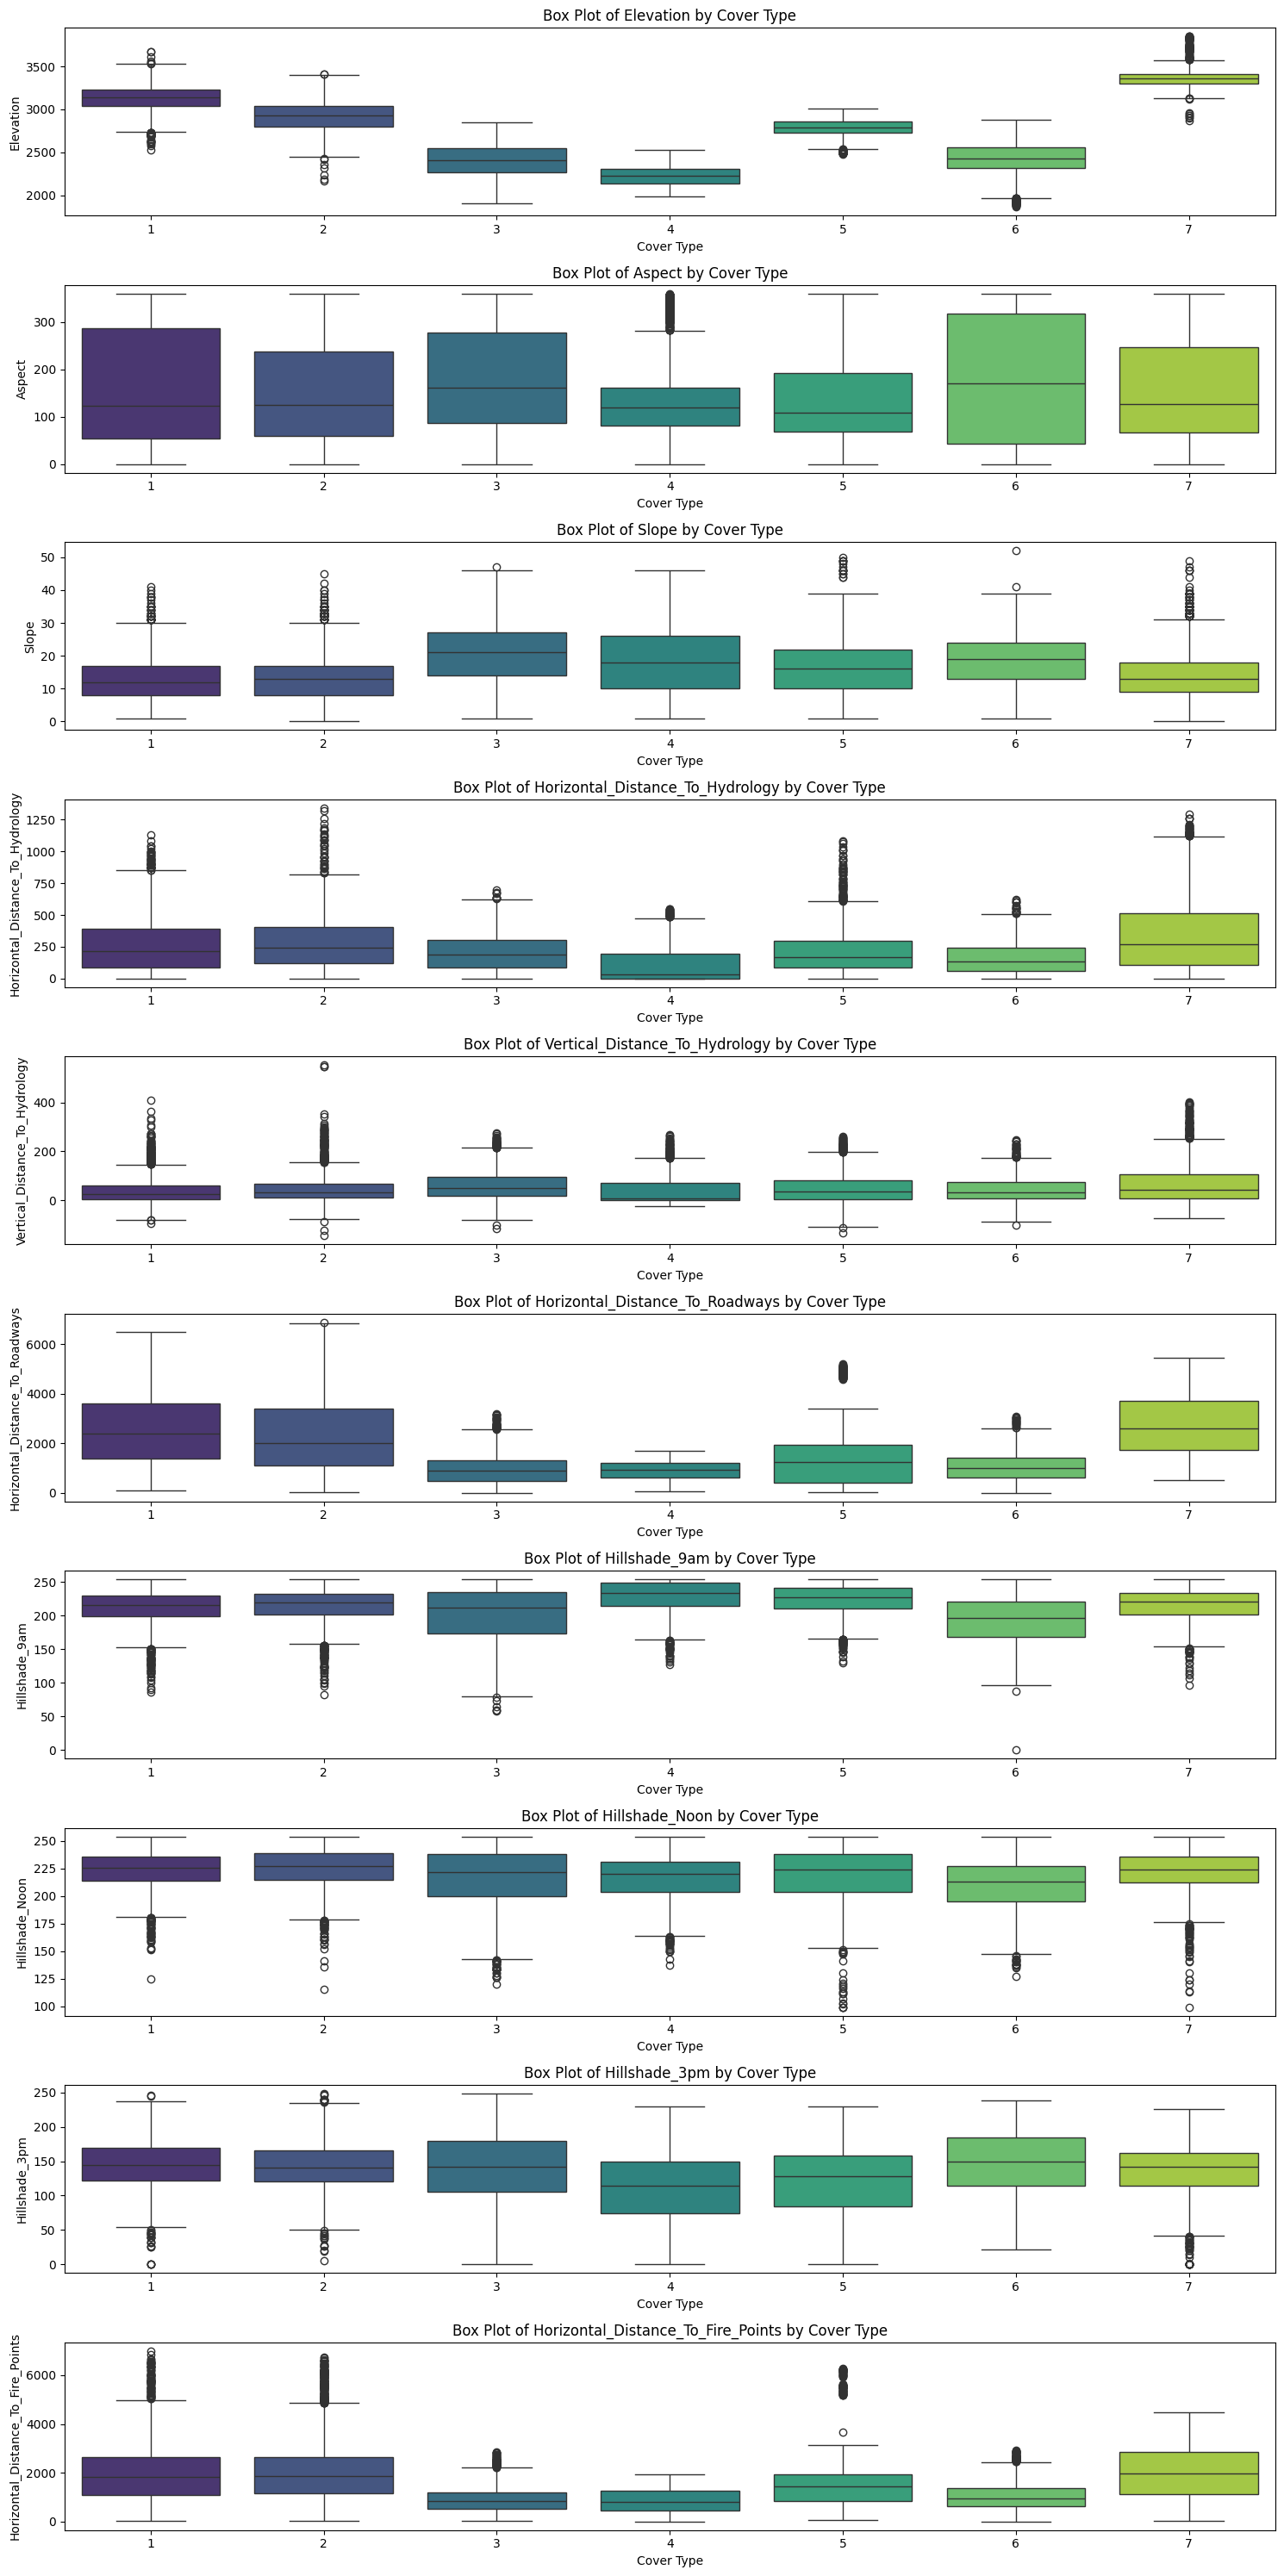

In [178]:
# Step 4.2: Box Plots of Continuous Features
plt.figure(figsize=(15, len(continuous_features) * 3))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(len(continuous_features), 1, i)
    sns.boxplot(x='Cover_Type', y=feature, data=data, palette='viridis')
    plt.title(f'Box Plot of {feature} by Cover Type')
    plt.xlabel('Cover Type')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

C:\Users\BHARATH\AppData\Local\Temp\ipykernel_59588\1448587886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cover_Type', data=data, palette='viridis')


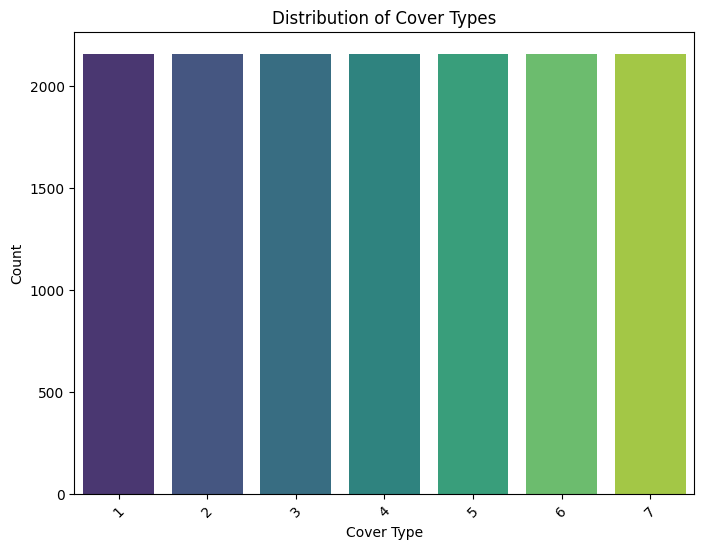

In [179]:
# Step 5: Count Plot of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=data, palette='viridis')
plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

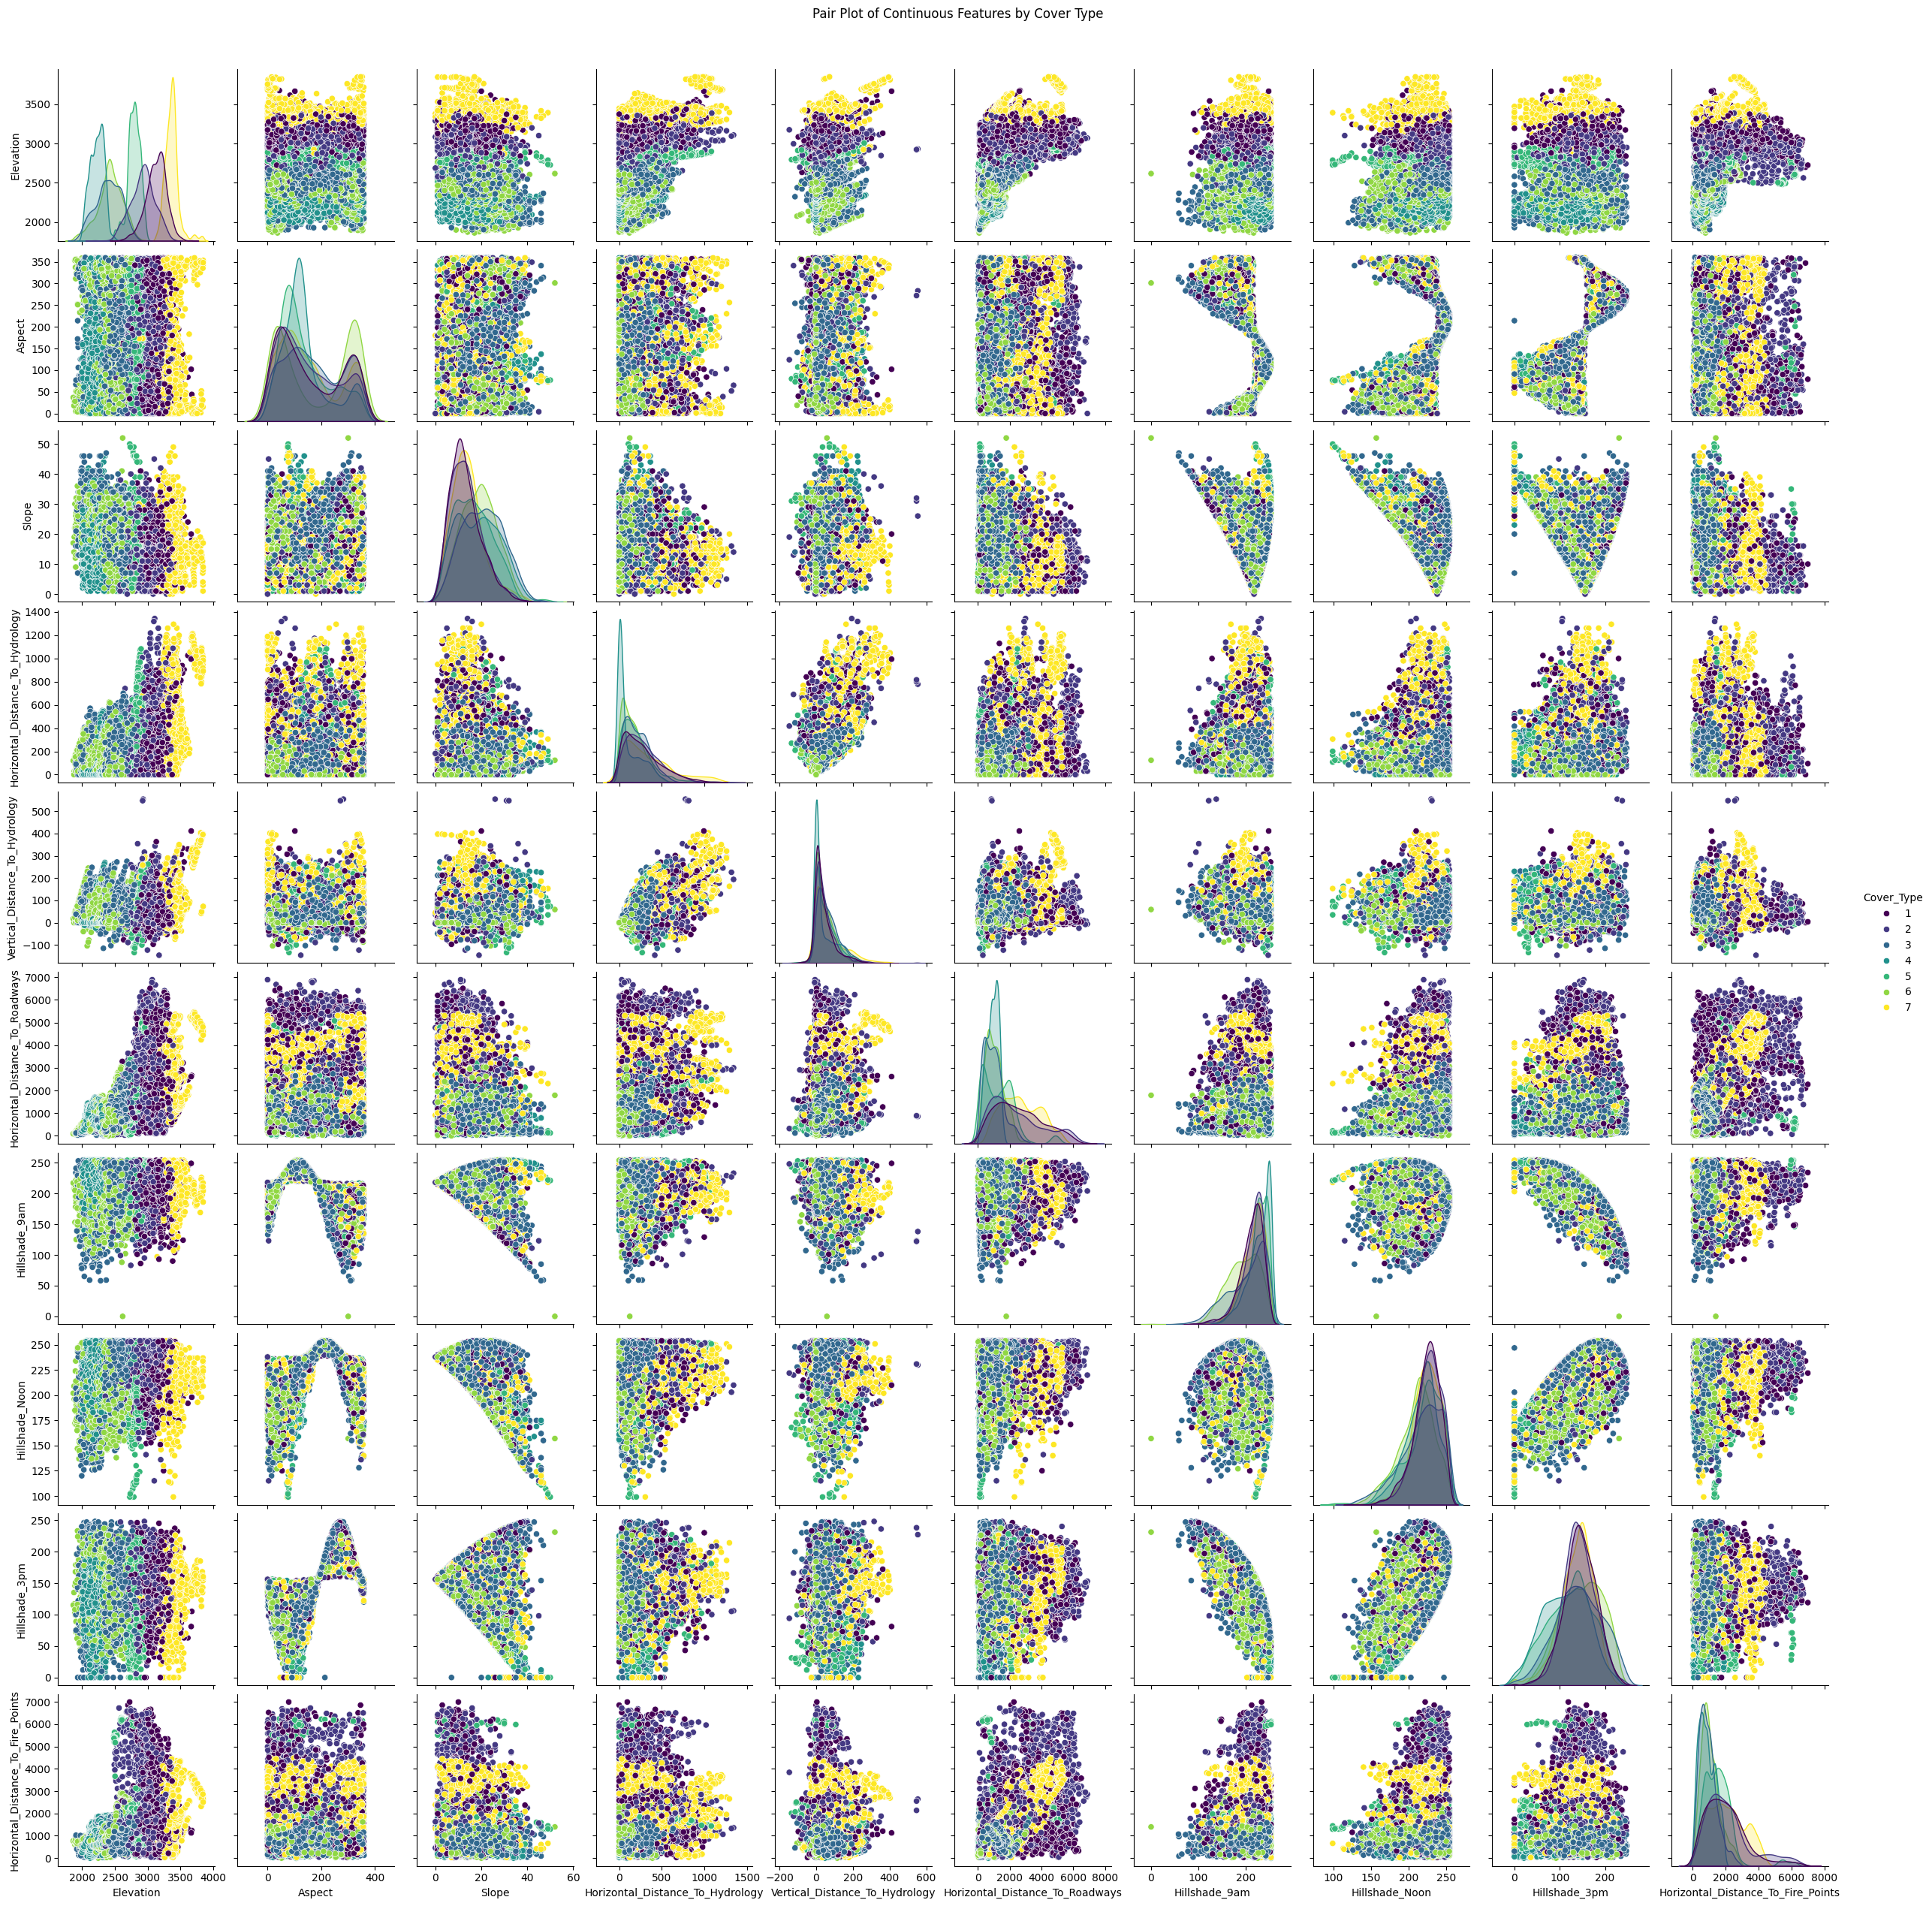

In [180]:
# Step 6: Pair Plot of Continuous Features
sns.pairplot(data, vars=continuous_features, hue='Cover_Type', palette='viridis')
plt.suptitle('Pair Plot of Continuous Features by Cover Type', y=1.02)
plt.show()

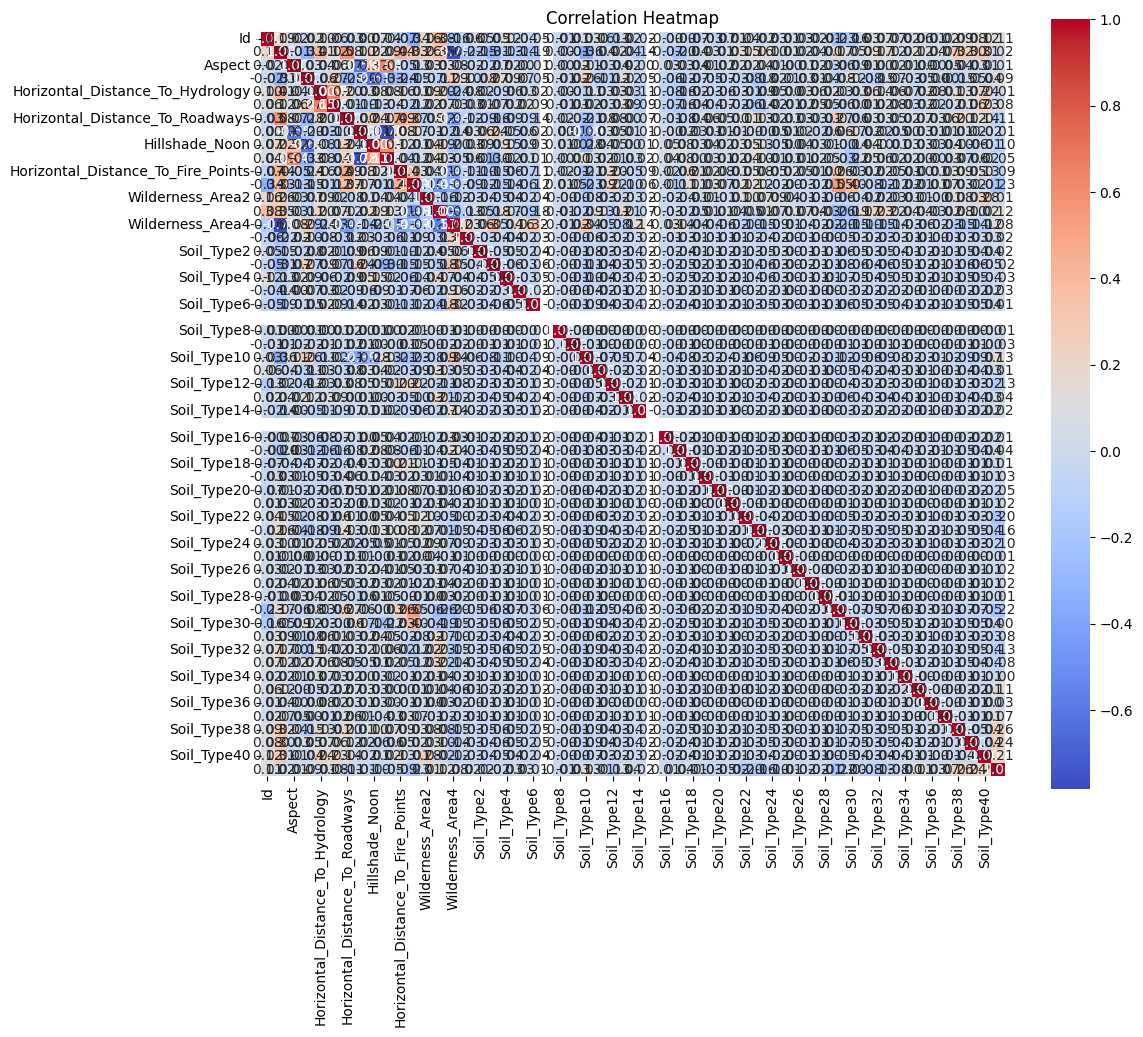

In [182]:
# Step 7: Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [183]:
# Step 8: Prepare Data for Modeling
# Split dataset into features (X) and target variable (y)
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']

In [196]:
# Step 9: Split the Dataset
#No need of splitting the dataset has we have seperate files
X_train, X_test, y_train,y_test= train_test_split(X, y,test_size=0.2,random_state=42)

In [185]:
# Step 10: Train Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# Step 11: Evaluate the Model
train_predictions = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [186]:
test_predictions = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.8799603174603174


In [187]:
# Step 12: Classification Report
print("Classification Report:")
print(classification_report(y_test, test_predictions))
print("Accuracy:",test_accuracy)

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.80      0.79       421
           2       0.83      0.71      0.77       438
           3       0.88      0.84      0.86       428
           4       0.93      0.98      0.95       449
           5       0.89      0.95      0.92       416
           6       0.87      0.90      0.89       432
           7       0.95      0.97      0.96       440

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024

Accuracy: 0.8799603174603174


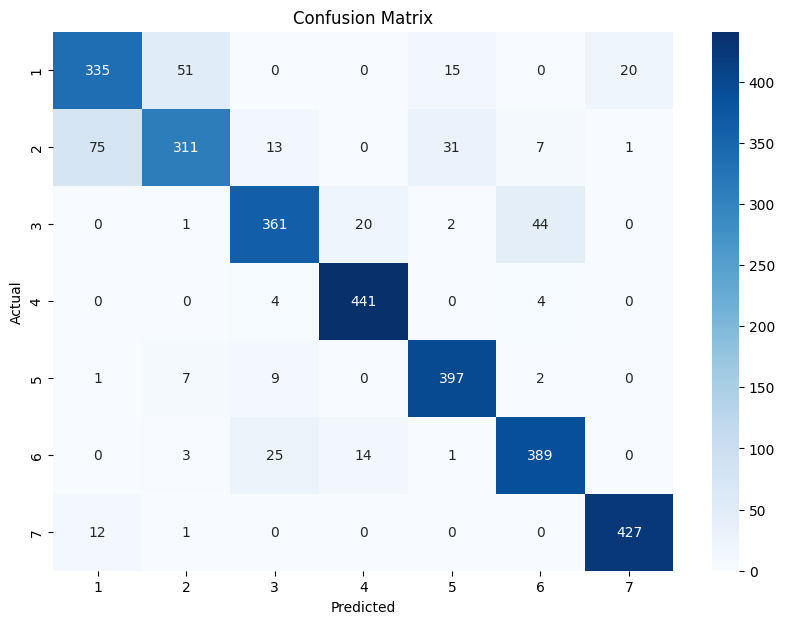

In [188]:
# Step 13: Confusion Matrix
cm = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [189]:
# Step 14: Save the Training and Testing Data
X_train_df = pd.DataFrame(X_train, columns=X.columns)
y_train_df = pd.DataFrame(y_train, columns=['Cover_Type'])
train_data = pd.concat([X_train_df, y_train_df], axis=1)
train_data.to_csv('trai.csv', index=False)

X_test_df = pd.DataFrame(y_test, columns=X.columns)
y_test_df = pd.DataFrame(y_test, columns=['Cover_Type'])
test_data = pd.concat([X_test_df, y_test_df], axis=1)
test_data.to_csv('tes.csv', index=False)

In [204]:
# Assuming y_test contains the true labels and `tuned_predictions` contains the predicted labels
# Mapping the numeric cover types to their respective names
cover_type_mapping = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"
}

# Create a DataFrame for the predictions with ID, Actual, and Predicted cover types
predictions_df = pd.DataFrame({
    'ID': range(1, len(y_test) + 1),
    'Actual': y_test.map(cover_type_mapping),  # Map actual cover types to their names
    'Predicted': [cover_type_mapping[pred] for pred in test_predictions]  # Map predicted cover types to their names
})

# Save to CSV
predictions_df.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'")


Predictions saved to 'predictions.csv'


In [205]:
df=pd.read_csv('predictions.csv')
df.head(10)

ID          Actual       Predicted
0   1     Douglas-fir     Douglas-fir
1   2  Ponderosa Pine     Douglas-fir
2   3      Spruce/Fir      Spruce/Fir
3   4      Spruce/Fir      Spruce/Fir
4   5  Ponderosa Pine  Ponderosa Pine
5   6           Aspen           Aspen
6   7      Spruce/Fir      Spruce/Fir
7   8  Lodgepole Pine  Lodgepole Pine
8   9     Douglas-fir     Douglas-fir
9  10  Ponderosa Pine  Ponderosa Pine